#Image Classification


##Data import and loading

In [ ]:
#-----------IMPORT DATASET--------------#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xzvf "/content/drive/SheredDrive/ML_HW2/food-101.tar.gz" -C "/content/drive/MyDrive/ML_HW2/"

In [ ]:
import glob
import os
datadir = '/content/drive/MyDrive/ML_HW2/food-101/'
folders_list = os.listdir(datadir+"images/")
print(folders_list)
n=0
counters=[]
for folder in folders_list:
  files = glob.glob(datadir+"images/"+folder+"/"+"*.jpg")
  i=0
  for file in files:
    i+=1
  counters.append(i)
  n+=1
print(counters)
#now I can select 10 classes for classification
my_folders=folders_list[0:10]
print(my_folders)
print(n)

['samosa', 'sashimi', 'spring_rolls', 'panna_cotta', 'greek_salad', 'foie_gras', 'tacos', 'pad_thai', 'ramen', 'pulled_pork_sandwich', 'bibimbap', 'crab_cakes', 'risotto', 'steak', 'frozen_yogurt', 'club_sandwich', 'carrot_cake', 'falafel', 'chicken_wings', 'chocolate_cake', 'tiramisu', 'spaghetti_bolognese', 'garlic_bread', 'scallops', 'edamame', 'pancakes', 'deviled_eggs', 'peking_duck', 'guacamole', 'clam_chowder', 'croque_madame', 'french_onion_soup', 'beef_carpaccio', 'donuts', 'ravioli', 'spaghetti_carbonara', 'french_fries', 'shrimp_and_grits', 'dumplings', 'tuna_tartare', 'sushi', 'takoyaki', 'breakfast_burrito', 'macarons', 'waffles', 'seaweed_salad', 'cannoli', 'pizza', 'hot_and_sour_soup', 'prime_rib', 'ice_cream', 'pho', 'lobster_roll_sandwich', 'nachos', 'oysters', 'escargots', 'strawberry_shortcake', 'chicken_quesadilla', 'chicken_curry', 'hamburger', 'cheese_plate', 'bread_pudding', 'lobster_bisque', 'huevos_rancheros', 'omelette', 'cheesecake', 'beet_salad', 'filet_mign

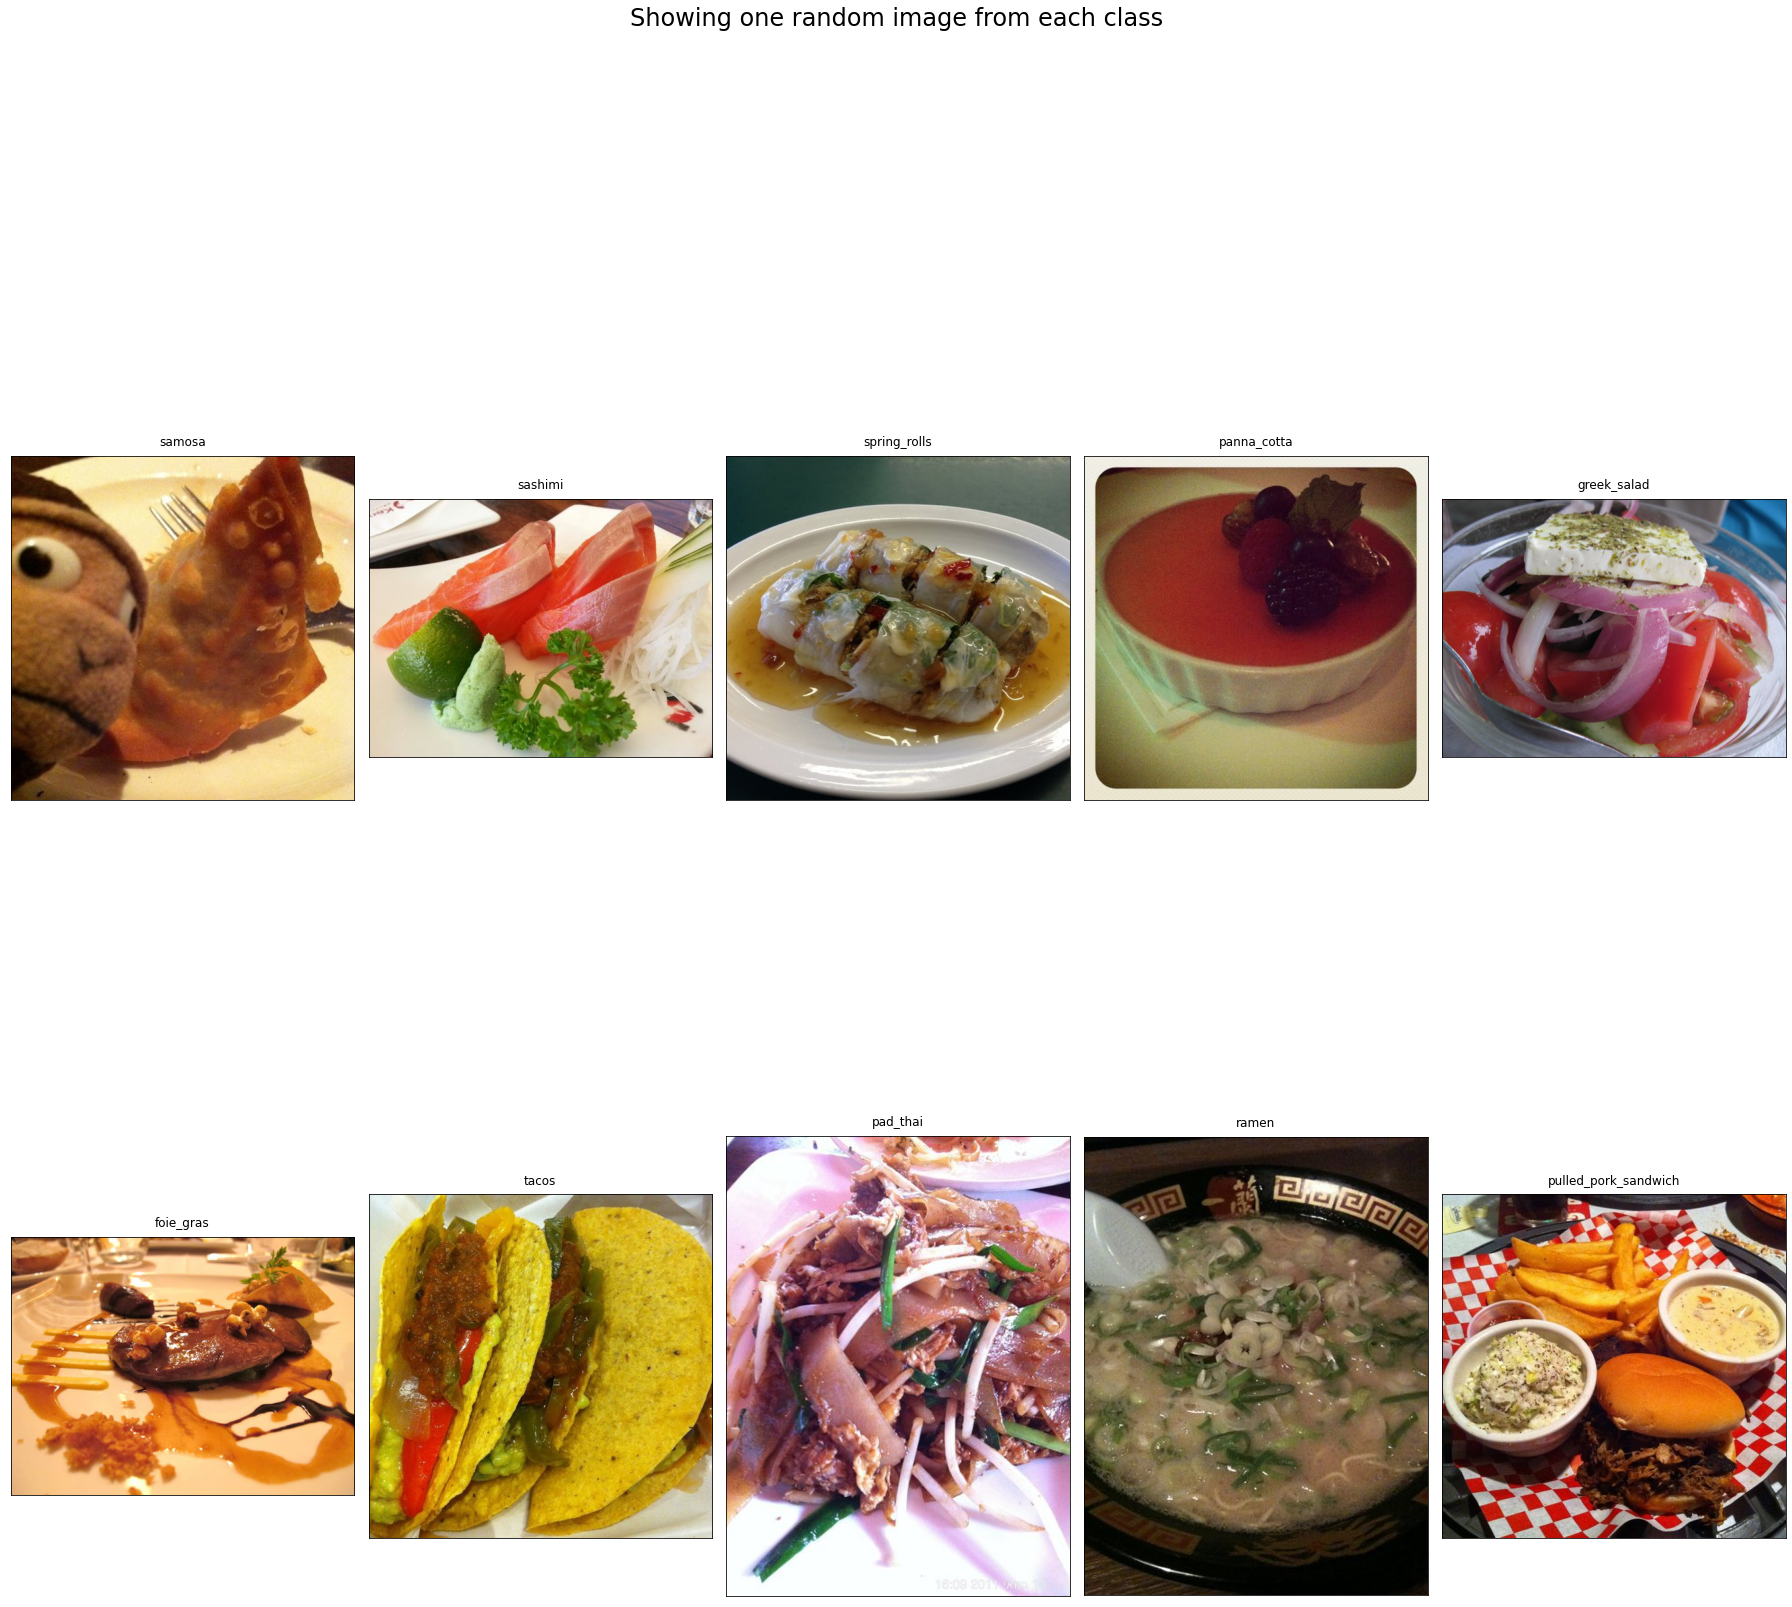

In [ ]:
#plot one sample from the 10 selected classes
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from collections import defaultdict
import collections

rows=2
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue

elem = 0
for i in range(rows):
  for j in range(cols):
    try:
      selected = my_folders[elem]
      elem += 1
    except:
      break
    selected_images = os.listdir(os.path.join(datadir+"images/",selected)) # returns the list of all files present in each food category
    selected_random = np.random.choice(selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(datadir+"images/",selected, selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [ ]:
classes_images = defaultdict(list)
print(classes_images)

defaultdict(<class 'list'>, {})


In [ ]:
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        if food[0] in my_folders:
          classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
print("Creating train data...")
prepare_data(datadir+'meta/train.txt', datadir+'images/', datadir+'train/')
prepare_data(datadir+'meta/test.txt', datadir+'images/', datadir+'test/')

In [ ]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for item in list :
    print("Copying images into",item)
    copytree(os.path.join(src,item), os.path.join(dest,item))

In [ ]:

src_train = datadir+'train'
dest_train = datadir+'train_mini'
src_test = datadir+'test'
dest_test = datadir+'test_mini'
dataset_mini(my_folders, src_train, dest_train)

Copying images into beignets
Copying images into prime_rib
Copying images into ramen
Copying images into hamburger
Copying images into bruschetta
Copying images into chicken_wings
Copying images into pork_chop
Copying images into greek_salad
Copying images into sashimi
Copying images into risotto


In [ ]:
dataset_mini(my_folders, src_test, dest_test)

Copying images into beignets
Copying images into prime_rib
Copying images into ramen
Copying images into hamburger
Copying images into bruschetta
Copying images into chicken_wings
Copying images into pork_chop
Copying images into greek_salad
Copying images into sashimi
Copying images into risotto


In [ ]:
drive.flush_and_unmount()

##Transfer learning

In [ ]:
datadir = '/content/drive/MyDrive/ML_HW2/food-101/'
trainingset = datadir+'train/'
testset = datadir + 'test/'
models_dir = datadir + 'models/'
results_dir = datadir + 'results/'
def savemodel(model,problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\nModel saved on file %s\n" %filename)

def savehistory(history,problem):
    filename = os.path.join(results_dir, '%s.hist' %problem)
    with open(filename, 'wb') as f:
        pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)
    print("\nHystory saved on file %s\n" %filename)

def loadhistory(problem):
    filename = os.path.join(results_dir, '%s.hist' %problem)
    with open(filename, 'rb') as f:
        history = pickle.load(f)
    print("\nHystory loaded from file %s\n" %filename)
    return history

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,\
                         UpSampling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

batch_size=30

train_datagen = ImageDataGenerator(rescale = 1. / 255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory=trainingset,
    target_size=(118, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255)
test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(118, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False)

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape
print(train_generator.n, test_generator.n)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
7500 2500


In [ ]:
#Pretraind or not
init_weights='imagenet' #if you want to use the pretrained model
#init_weights=None       #No pretrained

###Load inceptionV3


In [ ]:
# Load incv3 model


def load_inceptionV3_features(input_shape, init_weights=None):

    # define input tensor
    input0 = Input(shape=input_shape)

    # load VGG16 model (possibly pretrained model on imagenet) without the final dense layers (include_top=False)
    inceptionV3_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, weights=init_weights, input_tensor=input0)

    feature_extractor = tf.keras.models.Model(inputs=input0, outputs=inceptionV3_model.output, name="InceptionV3")

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    feature_extractor.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return feature_extractor

InceptionV3_feat_model = load_inceptionV3_features(input_shape, init_weights)
InceptionV3_feat_model.summary()

Model: "InceptionV3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 118, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 58, 111, 32)  864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 58, 111, 32)  96         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                        

In [ ]:
def transferNet_InceptionV3(input_shape, num_classes, output_layer_name, trainable_layers):

    # load the pre-trained model
    feature_extractor = load_inceptionV3_features(input_shape, init_weights=init_weights)

    # get the original input layer tensor
    input_t = feature_extractor.get_layer(index=0).input

    #set the feture extractor layers as non-trainable
    for idx,layer in enumerate(feature_extractor.layers):
      if layer.name in trainable_layers:
        layer.trainable = True
      else:
        layer.trainable = False

    # get the output tensor from a layer of the feature extractor
    output_extractor = feature_extractor.get_layer(name = output_layer_name).output

    #output_extractor = MaxPooling2D(pool_size=(4,4))(output_extractor)

    # # flat the output of a Conv layer
    flatten = Flatten()(output_extractor)
    flatten_norm = BatchNormalization()(flatten)

    # # add a Dense layer
    # dense1 = Dropout(0.4)(flatten_norm)
    # dense1 = Dense(200, activation='relu')(dense1)
    # dense1 = BatchNormalization()(dense1)

    # # add a Dense layer
    # dense2 = Dropout(0.6)(flatten_norm)
    # dense2 = Dense(100, activation='relu')(dense2)
    # dense2 = BatchNormalization()(dense2)

    # add the final output layer
    dense3 = BatchNormalization()(flatten_norm)
    dense3 = Dense(num_classes, activation='softmax')(dense3)

    model = tf.keras.models.Model(inputs=input_t, outputs=dense3, name="transferNet")

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model



# choose the layer from which you can get the features (block5_pool the end, glob_pooling to get the pooled version of the output)
name_output_extractor = "mixed10"
trainable_layers = ["conv2d_375"]

# build the transfer model
InceptionV3 = transferNet_InceptionV3(input_shape, num_classes, name_output_extractor, trainable_layers)
InceptionV3.summary()
history=None

Model: "transferNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 118, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_658 (Conv2D)            (None, 58, 111, 32)  864         ['input_8[0][0]']                
                                                                                                  
 batch_normalization_670 (Batch  (None, 58, 111, 32)  96         ['conv2d_658[0][0]']             
 Normalization)                                                                                   
                                                                                        

###Load vgg16

In [ ]:
# Load vgg16 model

def load_vgg16_features(input_shape, init_weights=None):

    # define input tensor
    input0 = Input(shape=input_shape)

    # load eff net model (possibly pretrained model on imagenet) without the final dense layers (include_top=False)
    vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights=init_weights, input_tensor=input0)

    feature_extractor = tf.keras.models.Model(inputs=input0, outputs=vgg16_model.output, name="vgg16")

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    feature_extractor.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return feature_extractor

#vgg16_model = load_vgg16_features(input_shape)
#vgg16_model.summary()

In [ ]:
def transferNet_vgg16(input_shape, num_classes, output_layer_name, trainable_layers):

    # load the pre-trained model
    feature_extractor = load_vgg16_features(input_shape, init_weights='imagenet')
    feature_extractor.trainable=False
    # get the original input layer tensor
    input_t = feature_extractor.get_layer(index=0).input




    # get the output tensor from a layer of the feature extractor
    output_extractor = feature_extractor.get_layer(name = output_layer_name).output

    #output_extractor = MaxPooling2D(pool_size=(4,4))(output_extractor)

    # flat the output of a Conv layer
    flatten = Flatten()(output_extractor)
    flatten_norm = BatchNormalization()(flatten)

    # add a Dense layer
    dense1 = Dropout(0.4)(flatten_norm)
    dense1 = Dense(200, activation='relu')(dense1)
    dense1 = BatchNormalization()(dense1)

    # add a Dense layer
    dense2 = Dropout(0.4)(dense1)
    dense2 = Dense(100, activation='relu')(dense2)
    dense2 = BatchNormalization()(dense2)

    #add the final output layer
    dense3 = BatchNormalization()(dense2)
    dense3 = Dense(num_classes, activation='softmax')(dense3)

    model = tf.keras.models.Model(inputs=input_t, outputs=dense3, name="transferNet")

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

    # choose the layer from which you can get the features (block5_pool the end, glob_pooling to get the pooled version of the output)
name_output_extractor = "block5_pool"
trainable_layers = ["block5_conv3"]

# build the transfer model
vgg16 = transferNet_vgg16(input_shape, num_classes, name_output_extractor, trainable_layers)
vgg16.summary()
history=None

58889256/58889256 [==============================] - 3s 0us/step
Model: "transferNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 118, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 118, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 118, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 59, 112, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 59, 112, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 59, 112, 128)      147584    
                                                        

##Training


In [ ]:
#model choice
select=[InceptionV3, vgg16]
model=select[1]

In [ ]:
#do this to change learning rate between two training phase
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.trainable=True
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['val_loss'])

In [ ]:
#accuracy on test

val_steps=test_generator.n//test_generator.batch_size+1
loss, acc = model.evaluate(test_generator,verbose=1,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)


In [ ]:
# fit the transferNet on the training data

stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=8)
mc = callbacks.ModelCheckpoint('inceptionv3.h5', monitor='val_accuracy', mode='max', save_best_only=True)
steps_per_epoch = train_generator.n//train_generator.batch_size
val_steps = test_generator.n//test_generator.batch_size+1

epochs = 10
try:
    transfer_history = model.fit(train_generator, epochs=epochs, verbose=1,
                                 callbacks=[stopping,mc],
                                 steps_per_epoch=steps_per_epoch,
                                 validation_data=test_generator,
                                 validation_steps=val_steps)
except KeyboardInterrupt:
    pass


# Save trained model and hystory
problemname = 'inceptionv3' #'vgg16'

if history is None:
    history = transfer_history.history
else:
    history['loss'].extend(transfer_history.history['loss'])
    history['accuracy'].extend(transfer_history.history['accuracy'])
    history['val_loss'].extend(transfer_history.history['val_loss'])
    history['val_accuracy'].extend(transfer_history.history['val_accuracy'])

savemodel(model,problemname)
savehistory(transfer_history,problemname)

Epoch 1/10
250/250 [==============================] - 60s 239ms/step - loss: 0.4281 - accuracy: 0.8651 - val_loss: 0.7347 - val_accuracy: 0.7620
Epoch 2/10
250/250 [==============================] - 57s 229ms/step - loss: 0.3921 - accuracy: 0.8761 - val_loss: 0.7356 - val_accuracy: 0.7600
Epoch 3/10
250/250 [==============================] - 57s 229ms/step - loss: 0.3755 - accuracy: 0.8807 - val_loss: 0.7337 - val_accuracy: 0.7608
Epoch 4/10
250/250 [==============================] - 57s 228ms/step - loss: 0.3670 - accuracy: 0.8800 - val_loss: 0.7382 - val_accuracy: 0.7592
Epoch 5/10
250/250 [==============================] - 58s 232ms/step - loss: 0.3332 - accuracy: 0.8971 - val_loss: 0.7357 - val_accuracy: 0.7604
Epoch 6/10
250/250 [==============================] - 58s 232ms/step - loss: 0.3135 - accuracy: 0.9015 - val_loss: 0.7401 - val_accuracy: 0.7588
Epoch 7/10
250/250 [==============================] - 57s 228ms/step - loss: 0.3008 - accuracy: 0.9052 - val_loss: 0.7405 - val_ac

##Results



In [ ]:
print(transfer_history)

In [ ]:
# summarize history for accuracy
import numpy as np
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(np.min(history['accuracy']), 1.0)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.0, np.max(history['loss']))
plt.legend(['train', 'test'], loc='lower left')
plt.show()

In [ ]:
from keras.models import load_model
saved_model = load_model('inceptionv3.h5')

In [ ]:
#precision recall f-score
import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

# accuracy
score = saved_model.evaluate(test_generator,verbose=1,steps=val_steps)
print("Test loss: %f" %score[0])
print("Test accuracy: %f" %score[1])

preds = model.predict(test_generator,verbose=1,steps=val_steps)
Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes
print('%s' %str(Ypred.shape))
print('%s' %str(Ytest.shape))

print(classification_report(Ytest, Ypred, digits=3))



In [ ]:
#confusion matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1,2,3,4,5,6,7,8,9]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_pred = np.argmax(preds, axis=1)
y_test = test_generator.classes  # shuffle=False in test_data
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plot_confusion_matrix(y_test, y_pred, classes=my_folders, normalize=False)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_generator.classes, Ypred)

conf = [] # data structure for confusions: list of (i,j,cm[i][j])
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  # decreasing order by 3-rd column (i.e., cm[i][j])

print('%-16s     %-16s  \t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(my_folders[k[0]],my_folders[k[1]],k[2],k[2]*100.0/test_generator.n))

In [ ]:
import sklearn.metrics
from sklearn.metrics import classification_report

preds = saved_model.predict(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_data




print(classification_report(Ytest, Ypred, labels=None, target_names=my_folders, digits=3))